# Stock Price Predicition 

# Importing Libraries

In [2]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#including LSTM model library
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Making read the .csv file

In [4]:
#read the file
'''
There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover. 
The profit or loss calculation is usually determined by the closing price of a stock for the day; 
hence we will be considering the closing price as the target variable.
'''

df = pd.read_csv("D:\\College Files\\AI,ML,DL\\NSE-TATAGLOBAL11.csv")

In [5]:
#print the head and looking at first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2019-10-08  208.00  222.25  206.85  216.00  215.15               4642146   
1  2019-10-05  217.00  218.60  205.90  210.25  209.20               3519515   
2  2019-10-04  223.50  227.80  216.15  217.25  218.20               1728786   
3  2019-10-03  230.00  237.50  225.75  226.45  227.60               1708590   
4  2019-10-01  234.55  234.60  221.05  230.30  230.90               1534749   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  

 Shape of the data:
(1235, 8)


# Analyzing the closing price

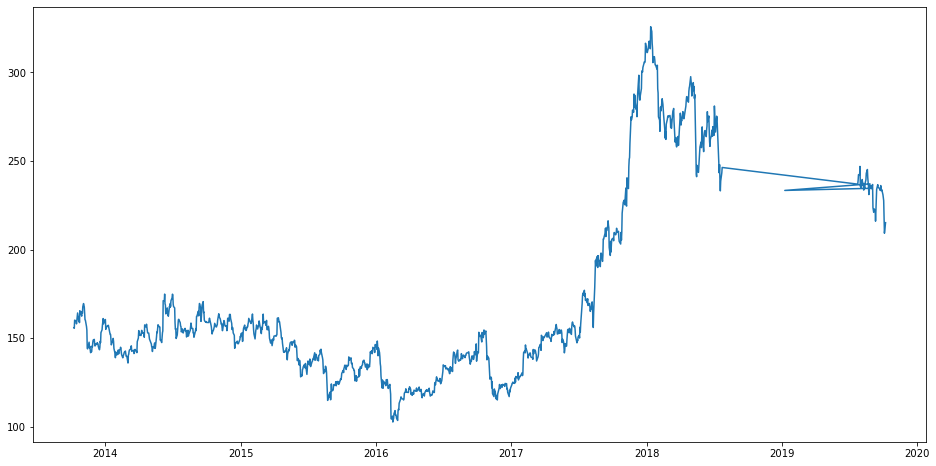

In [6]:
#Setting index as date
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

# Sorting the dataset acc. to date and closing price

In [7]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [8]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# Normalize the data into train and valid sets

In [9]:
#creating train and valid sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

# Converting data 

In [10]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Creating LSTM network

In [11]:
# create and fit the LSTM network
'''
Long Short-Term Memory (LSTM) networks are a type of recurrent neural network 
capable of learning order dependence in sequence prediction problems.
'''

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

927/927 - 40s - loss: 0.0013


In [12]:
#predicting values, using past 60 values from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

# Plotting Final prediction

<ipython-input-14-8fdd2397322f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


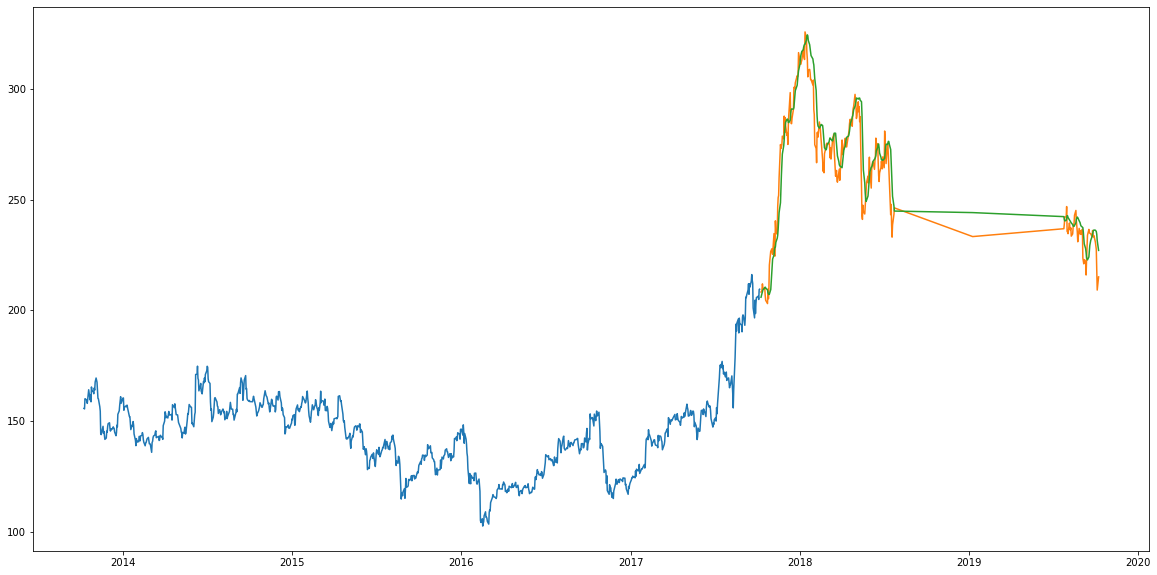

In [14]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score=np.sqrt(np.mean(np.power((valid-closing_price),2)))
accuracy_score

Close          10.174441
Predictions     0.000000
dtype: float64